In [1]:
!python -m pip install yellowbrick

In [28]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
np.random.seed(500)
Corpus = pd.read_csv('../../dados/bbc-text.csv', delimiter=',', encoding='latin-1')
Corpus.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
Corpus["text"].dropna(inplace=True)
Corpus["category"].dropna(inplace=True)

In [6]:
trans = str.maketrans('\n\r\t', '   ')
Corpus["text_no_enter"] = Corpus["text"].str.translate(trans)

In [7]:
contraction_dict = {
                    "aren't": "are not",
                    "can't": "can not",
                    "could've": "could have",
                    "couldn't": "could not",
                    "daren't": "dare not",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he's": "he is",
                    "how'd": "how had",
                    "how're": "how are",
                    "how's": "how is",
                    "how've": "how have",
                    "i'd": "i had",
                    "i'm": "i am",
                    "i've": "i have",
                    "isn't": "is+ not",
                    "it's": "it is",
                    "might've": "might have",
                    "mightn't": "might not",
                    "must've": "must have",
                    "mustn't": "must not",
                    "needn't": "need not",
                    "oughtn't": "ought not",
                    "shan't": "shall not",
                    "she'd": "she had",
                    "she's": "she is",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "that'd": "that had",
                    "thats's": "that is",
                    "there'd": "there had",
                    "there's": "there is",
                    "they'd": "they had",
                    "they're": "you are",
                    "they've": "they have",
                    "wasn't": "was+ not",
                    "we'd": "we had",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'd": "what had",
                    "what're": "what are",
                    "what's": "what is",
                    "what've": "what have",
                    "when'd": "when had",
                    "when're": "when are",
                    "when's": "when is",
                    "when've": "when have",
                    "where'd": "where had",
                    "where're": "where are",
                    "where's": "where is",
                    "where've": "where have",
                    "who'd": "who had",
                    "who're": "who are",
                    "who's": "who is",
                    "who've": "who have",
                    "why'd": "why had",
                    "why're": "why are",
                    "why's": "why is",
                    "why've": "why have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "you're": "you are",
                    "you've": "you have",
                    "'cause": "because", 
                    "ain't": "is not", 
                    "aren't": "are not",
                    "can't": "cannot", 
                    "could've": "could have",
                    "he's": "he is",
                    "how'll": "how will",
                    "i'll": "i will",
                    "it'll": "it will",
                    "it's": "it is", 
                    "she'll": "she will",
                    "she's": "she is",
                    "that'll": "that will",
                    "there'll": "there will",
                    "they'll": "they will",
                    "they're": "they are",
                    "we'll": "we will",
                    "we're": "we are",
                    "what'll": "what will",
                    "when'll": "when will",
                    "where'll": "where will",
                    "who'll": "who will",
                    "yo're": "you are",
                    "you'll": "you will"
}

In [8]:
def remove_contractions( text ):
    # print(text)
    # print(type(text))
    if (type(text) == str):
        text = text.lower()
        # print(text)
        for chave in list(contraction_dict.keys()):
            valor = contraction_dict[chave]
            text = text.replace(chave, valor)
        text = text.replace("\'s", " have")        
        return text
    else:
        return ""

In [9]:
Corpus["text_no_contraction"] = Corpus["text_no_enter"].apply(remove_contractions)

In [12]:
translator = str.maketrans('', '', string.punctuation)
Corpus["text_no_punctuation"]  = Corpus["text_no_contraction"] .str.translate(translator)

In [13]:
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
def remove_stop_words( text ):
    nova_lista = []
    palavras = text.split(" ")
    for palavra in palavras:
        if palavra not in stopwords:
            nova_lista.append(palavra)
    return " ".join(nova_lista)

In [15]:
Corpus["text_no_stops"] = Corpus["text_no_punctuation"] .apply(remove_stop_words)

In [18]:
stemmer = nltk.PorterStemmer()
Corpus["text_stemmed"] = Corpus["text_no_stops"].apply(stemmer.stem)

In [19]:
textos = Corpus["text_stemmed"]

In [24]:
train_X, test_X, train_Y, test_Y = train_test_split(textos, Corpus["category"], test_size=0.25, random_state=50)

In [25]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(train_Y)
Test_Y = Encoder.fit_transform(test_Y)

In [26]:
vetorizador = TfidfVectorizer(max_features=5000)
vetorizador.fit(textos)
Train_X = vetorizador.transform(train_X)
Test_X = vetorizador.transform(test_X)

In [29]:
# fit the training dataset on the NB classifier
Naive = MultinomialNB()
Naive.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  97.48653500897666


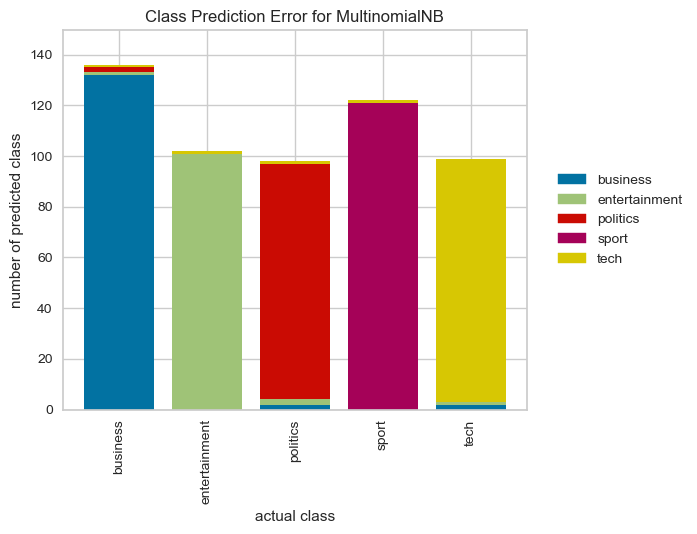

In [32]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    Naive, classes=Encoder.classes_
)

# Fit the training data to the visualizer
visualizer.fit(Train_X,Train_Y)

# Evaluate the model on the test data
visualizer.score(Test_X, Test_Y)

# Draw visualization
g = visualizer.poof()

In [31]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Train_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

ValueError: Found input variables with inconsistent numbers of samples: [1668, 557]

In [ ]:
print(classification_report(Test_Y,predictions_SVM))

In [17]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    SVM, classes=Encoder.classes_
)

# Fit the training data to the visualizer
visualizer.fit(Train_X,Train_Y)

# Evaluate the model on the test data
visualizer.score(Train_X, Test_Y)

# Draw visualization
g = visualizer.poof()

NameError: name 'ClassPredictionError' is not defined